# Simpsons Classifier 

## Written in FastAI PyTorch

This program takes a dataset of Simpsons characters and classifies them.  This is a CNN with transfer learning from ResNet50 written in FastAI PyTorch.  The dataset was procured from Kaggle at https://www.kaggle.com/alexattia/the-simpsons-characters-dataset

For information on FastAI, check out fast.ai 
If you would like to learn FastAI, check out their course at https://course.fast.ai/ and access the free notebooks at https://github.com/fastai/fastbook

In [1]:
# Import the necessary library
from fastai.vision.all import *

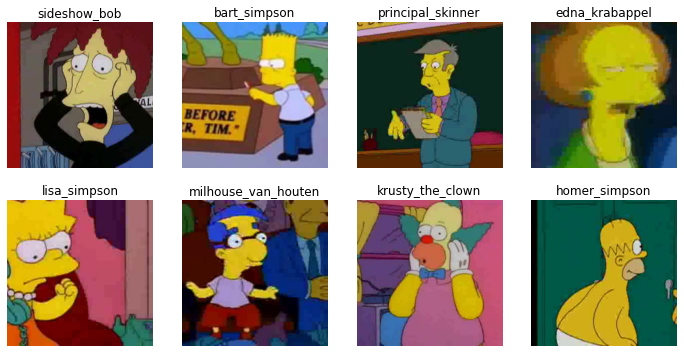

In [2]:
# Create a path object.  This will be specific for your dataset.
path=Path('../Simpsons/simpsons_dataset/')

# Setup the DataBlock to access the data in their folders, and setup the dataloaders (num_workers=0 for my Windows machine)
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(valid_pct=0.25, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224),
    ).dataloaders(path, num_workers=0)

# Lets check out a couple of the images
dls.valid.show_batch(max_n=8, nrows=2)

The minimum is at 0.0145 and the steepest slope is at 0.0063.
Try the steepest slope or the minimum divided by 10: 0.0014


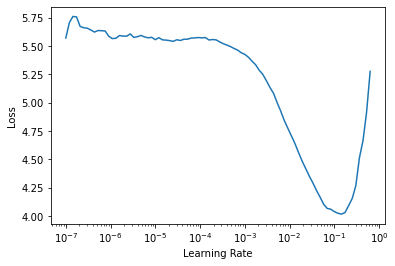

In [3]:
# Make a CNN learner with transfer learning from resnet34
learn = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy, Precision(average='macro'), Recall(average='macro')])

#Find the learning rate for the system
lr_min, lr_steep = learn.lr_find()
print(f"The minimum is at {lr_min:.4f} and the steepest slope is at {lr_steep:.4f}.\nTry the steepest slope or the minimum divided by 10: {(lr_min)/10:.4f}")
steep = lr_steep/1.0

In [4]:
# Fine tune the model, freeze the hidden layers for 2 epochs to train the output layers, then 8 epochs with all layers
learn.fine_tune(epochs=8, base_lr=steep, freeze_epochs=2)

epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,time
0,0.845748,0.451634,0.125167,0.874833,0.791884,0.637931,06:16
1,0.520504,0.265691,0.070992,0.929008,0.914683,0.783331,05:34


epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,time
0,0.216421,0.125854,0.032582,0.967418,0.948304,0.854884,06:36
1,0.204839,0.240777,0.051022,0.948978,0.895076,0.854623,06:27
2,0.174049,0.102042,0.026658,0.973342,0.955204,0.938105,06:25
3,0.124692,0.078407,0.018632,0.981368,0.976042,0.942086,06:25
4,0.045655,0.062480,0.013472,0.986528,0.976697,0.950363,06:17
5,0.021819,0.033996,0.006306,0.993694,0.988800,0.975022,06:59
6,0.012650,0.027613,0.004682,0.995318,0.993734,0.993540,07:20
7,0.007433,0.027237,0.004491,0.995509,0.992838,0.993618,06:29


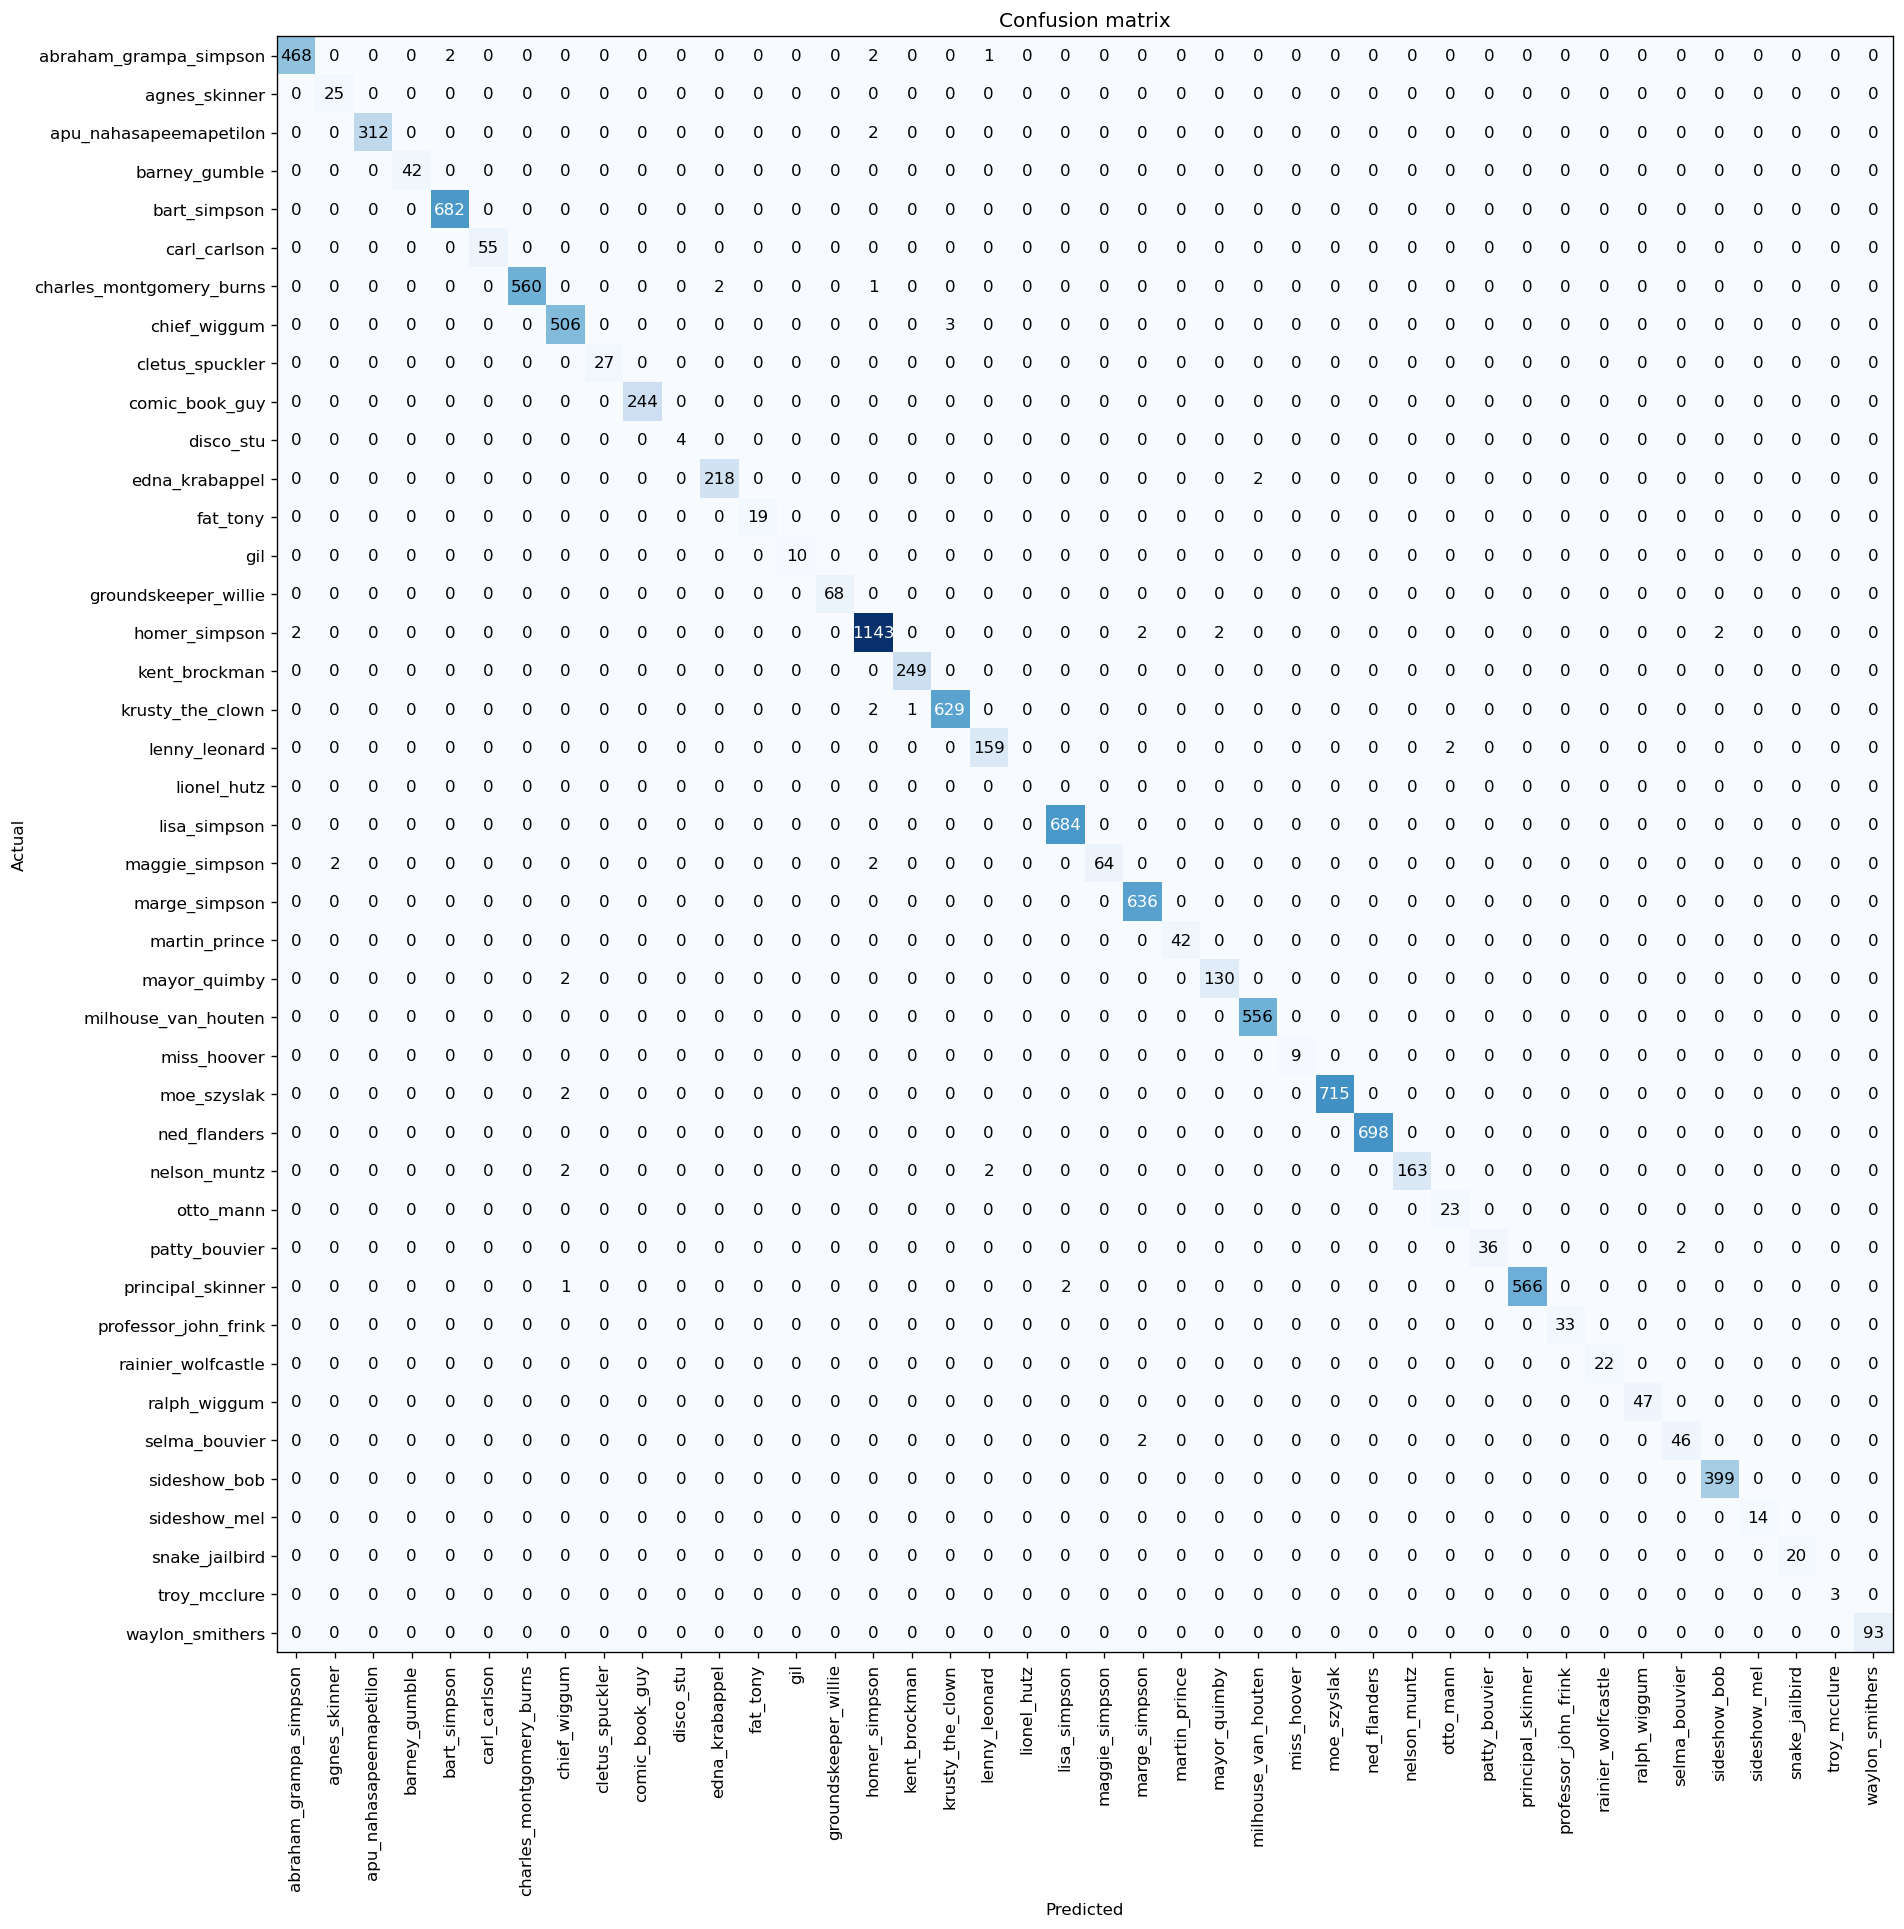

In [5]:
# Plot a confusion matrix of the 
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(16,16), dpi=120)

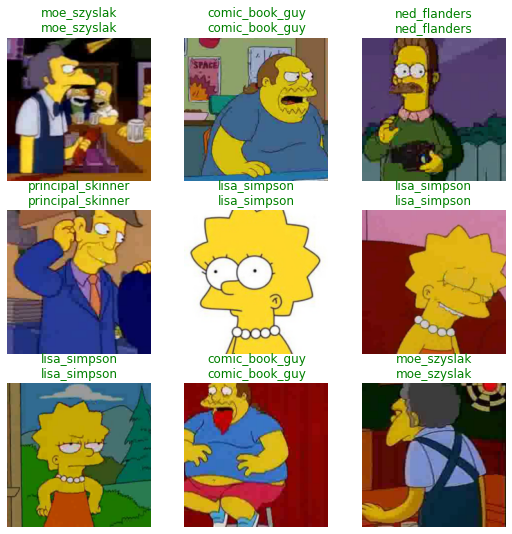

In [10]:
# And let's see some results of the model
learn.show_results()

# Where to go from here:

There are many things that could be done to this model, including:
    -Saving it to use in an application
    -Working to increase the metrics of correctness
    -Feature engineering to get the model able to handle more diverse data
    -Identifying the images of greatest loss and working to improve those
    -Sitting back with a G&T and enjoying an episode of The Simpsons
    
Additionally, this was created with a ResNet model.  Perhaps there is another model that suits your technological fancy for accuracy or time.  See you in Springfield.